# House Price Prediction

In [55]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
# load dataset
df = pd.read_csv("housing_dataset.csv")
df.head()

,S.no.,beds,baths,size,zip_code,price
0,0,3,2.5,2590.0,98144,795000.0
1,1,4,2.0,2240.0,98106,915000.0
2,2,4,3.0,2040.0,98107,950000.0
3,3,4,3.0,3800.0,98199,1950000.0
4,4,2,2.0,1042.0,98102,950000.0


In [58]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.no.     2016 non-null   int64  
 1   beds      2016 non-null   int64  
 2   baths     2016 non-null   float64
 3   size      2016 non-null   float64
 4   zip_code  2016 non-null   int64  
 5   price     2016 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 94.6 KB


In [59]:
df.shape

(2016, 6)

In [60]:
df.describe()

,S.no.,beds,baths,size,zip_code,price
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,1007.500000,2.857639,2.159970,1735.740575,98123.638889,9.636252e+05
std,582.113391,1.255092,1.002023,920.132591,22.650819,9.440954e+05
min,0.000000,1.000000,0.500000,250.000000,98101.000000,1.590000e+05
25%,503.750000,2.000000,1.500000,1068.750000,98108.000000,6.017500e+05
50%,1007.500000,3.000000,2.000000,1560.000000,98117.000000,8.000000e+05
75%,1511.250000,4.000000,2.500000,2222.500000,98126.000000,1.105250e+06
max,2015.000000,15.000000,9.000000,11010.000000,98199.000000,2.500000e+07


In [61]:
#checking missing values
print(df.isnull().sum())

S.no.       0
beds        0
baths       0
size        0
zip_code    0
price       0
dtype: int64


In [62]:
df.duplicated().sum()


np.int64(0)

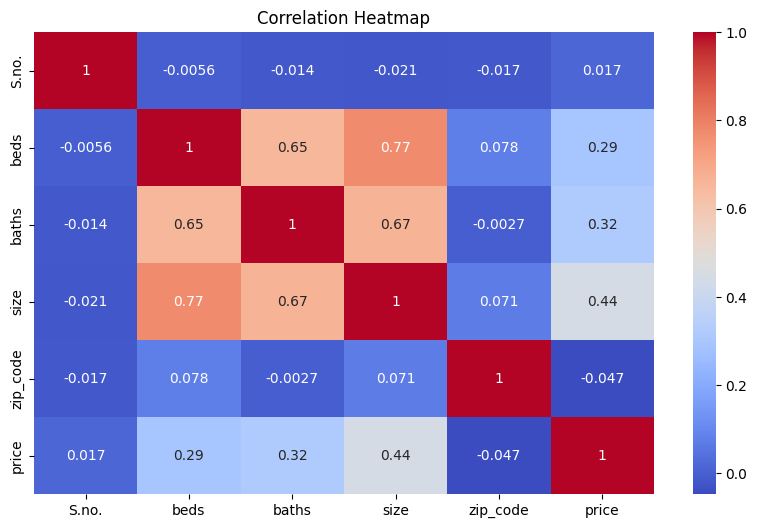

In [63]:
# correlation heatmap (EDA)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

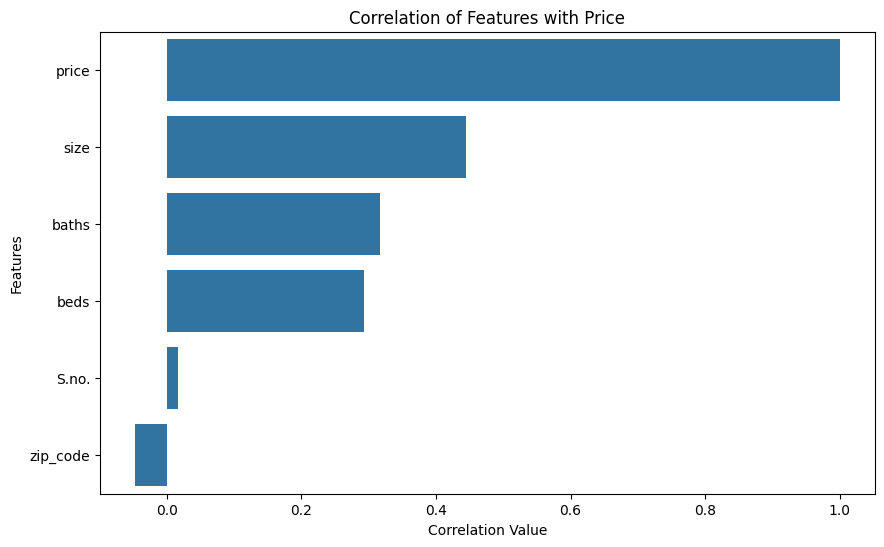

In [64]:
plt.figure(figsize=(10,6))

corr = df.corr()["price"].sort_values(ascending=False)

sns.barplot(x=corr.values, y=corr.index)

plt.title("Correlation of Features with Price")
plt.xlabel("Correlation Value")
plt.ylabel("Features")
plt.show()

define features and target

In [65]:

x= df.drop("price", axis=1)
y = df["price"]

train test split

In [66]:

x_train, x_test,y_train,y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42
)

model training

In [67]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor

create model dictionary

In [68]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()

}

train and evaluate all models

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = []

for name, model in models.items():
    
    model.fit(x_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2 Score", ascending=False)

print(results_df)

               Model            MAE           RMSE  R2 Score
0  Linear Regression  220212.876579  369193.657149  0.586700
2              Lasso  220212.834183  369194.065197  0.586699
1              Ridge  220207.957592  369208.624188  0.586666
8                KNN  236451.649505  413100.051144  0.482551
3      Decision Tree  253778.764851  441579.994909  0.408743
4      Random Forest  219877.755470  494987.037478  0.257075
5  Gradient Boosting  233868.290630  573026.205792  0.004351
7                SVR  356457.376970  584415.996232 -0.035623
6        Extra Trees  216649.076337  700926.395580 -0.489712


pick best model

In [71]:
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name] 

print(f"\n Best Model is: {best_model_name}")


 Best Model is: Linear Regression


Save best model

In [72]:
pip install os

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for os


In [73]:
pip install pickle

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for pickle


In [77]:
import os 
import pickle

#check where we are saving
print("current working directory:", os.getcwd())

#save inside model folder
file_path = os.path.join("model", "model.pkl")

with open(file_path, "wb") as f:
    pickle.dump(best_model, f)

print("Model saved successfully at:", file_path)

current working directory: c:\Users\mir_w\OneDrive\Desktop\House Price Prediction


FileNotFoundError: [Errno 2] No such file or directory: 'model\\model.pkl'